# Recommendation Engine for IBM


## Table of Contents

1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
2. [Rank Based Recommendations](#Rank)<br>
3. [User-User Based Collaborative Filtering](#User-User)<br>
4. [Matrix Factorization](#Matrix-Fact)<br>
5. [Extras & Concluding](#conclusions)


In [4]:
# Import of libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import project_tests as t #is this needed?
import pickle

%matplotlib inline

# Create dataframe with data from two csv files

df = pd.read_csv('data/user-item-interactions.csv')
df_content = pd.read_csv('data/articles_community.csv')
del df['Unnamed: 0']
del df_content['Unnamed: 0']

# Check
df.head(10)

,article_id,title,email
0,1430.0,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1314.0,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,1429.0,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,1338.0,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,1276.0,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2
5,1432.0,visualize data with the matplotlib library,b32cd4e1a74e55ac42e4ef484b1f0ad41ee3b1c5
6,1429.0,use deep learning for image classification,3c2de1b0a92728aa53064a22ff7bd7319878ed95
7,593.0,upload files to ibm data science experience us...,3bbca9c41c66c4ecc46bc14eac7b7ab1ab0a5bea
8,1314.0,healthcare python streaming application demo,8b6fb4bbb7a27b336ba35420bf58337d877455c7
9,1185.0,classify tumors with machine learning,35d5799b6ea3ba24f921ed38f7f9a8039ad06ba4


In [5]:
# Check
df_content.head(10)

,doc_body,doc_description,doc_full_name,doc_status,article_id
0,Skip navigation Sign in SearchLoading...\r\n\r...,Detect bad readings in real time using Python ...,Detect Malfunctioning IoT Sensors with Streami...,Live,0
1,No Free Hunch Navigation * kaggle.com\r\n\r\n ...,"See the forest, see the trees. Here lies the c...",Communicating data science: A guide to present...,Live,1
2,☰ * Login\r\n * Sign Up\r\n\r\n * Learning Pat...,Here’s this week’s news in Data Science and Bi...,"This Week in Data Science (April 18, 2017)",Live,2
3,"DATALAYER: HIGH THROUGHPUT, LOW LATENCY AT SCA...",Learn how distributed DBs solve the problem of...,DataLayer Conference: Boost the performance of...,Live,3
4,Skip navigation Sign in SearchLoading...\r\n\r...,This video demonstrates the power of IBM DataS...,Analyze NY Restaurant data using Spark in DSX,Live,4
5,Compose is all about immediacy. You want a new...,Using Compose's PostgreSQL data browser.,Browsing PostgreSQL Data with Compose,Live,5
6,UPGRADING YOUR POSTGRESQL TO 9.5Share on Twitt...,Upgrading your PostgreSQL deployment to versio...,Upgrading your PostgreSQL to 9.5,Live,6
7,Follow Sign in / Sign up 135 8 * Share\r\n * 1...,For a company like Slack that strives to be as...,Data Wrangling at Slack,Live,7
8,* Host\r\n * Competitions\r\n * Datasets\r\n *...,Kaggle is your home for data science. Learn ne...,Data Science Bowl 2017,Live,8
9,THE GRADIENT FLOW\r\nDATA / TECHNOLOGY / CULTU...,[A version of this post appears on the O’Reill...,Using Apache Spark to predict attack vectors a...,Live,9


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

`1.` What is the distribution of how many articles a user interacts with in the dataset?

In [12]:
# Check null values in dataframes

print("Null values in df:")
print(df.isnull().sum())
print()
print("Null values in df_content:")
print(df_content.isnull().sum())

Null values in df:
article_id     0
title          0
email         17
dtype: int64

Null values in df_content:
doc_body           14
doc_description     3
doc_full_name       0
doc_status          0
article_id          0
dtype: int64


In [18]:
# Count user interaction by mail
user_interac = df.email.value_counts(dropna=False)
print(user_interac)

2b6c0f514c2f2b04ad3c4583407dccd0810469ee    364
77959baaa9895a7e2bdc9297f8b27c1b6f2cb52a    363
2f5c7feae533ce046f2cb16fb3a29fe00528ed66    170
a37adec71b667b297ed2440a9ff7dad427c7ac85    169
8510a5010a5d4c89f5b07baac6de80cd12cfaf93    160
f8c978bcf2ae2fb8885814a9b85ffef2f54c3c76    158
284d0c17905de71e209b376e3309c0b08134f7e2    148
d9032ff68d0fd45dfd18c0c5f7324619bb55362c    147
18e7255ee311d4bd78f5993a9f09538e459e3fcc    147
276d9d8ca0bf52c780b5a3fc554fa69e74f934a3    145
c60bb0a50c324dad0bffd8809d121246baef372b    145
56832a697cb6dbce14700fca18cffcced367057f    144
b2d2c70ed5de62cf8a1d4ded7dd141cfbbdd0388    142
ceef2a24a2a82031246814b73e029edba51e8ea9    140
8dc8d7ec2356b1b106eb3d723f3c234e03ab3f1e    137
e38f123afecb40272ba4c47cb25c96a9533006fa    136
53db7ac77dbb80d6f5c32ed5d19c1a8720078814    132
6c14453c049b1ef4737b08d56c480419794f91c2    131
fd824fc62b4753107e3db7704cd9e8a4a1c961f1    116
c45f9495a76bf95d2633444817f1be8205ad542d    114
12bb8a9740400ced27ae5a7d4c990ac3b7e3c77d

In [35]:
# Median and maximum number of user_article interactios below

top_articles = df.article_id.value_counts(dropna=False)

all_user = np.cumsum(top_articles.values)

# 50% of individuals interact with ____ number of articles or fewer.
median_val = len(all_user[all_user <= len(user_interac)/2])

# The maximum number of user-article interactions by any 1 user is ______.
max_views_by_user = user_interac.iloc[0]

print("50% of individuals interact with this number of articles or fewer:")
print(median_val)
print()
print("The maximum number of user-article interactions by any 1 user is:")
print(max_views_by_user)

50% of individuals interact with this number of articles or fewer:
3

The maximum number of user-article interactions by any 1 user is:
364


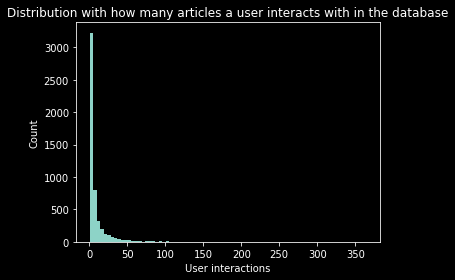

In [45]:
# Distribution of how many articles a user interacts with in the dataframe

plt.figure()
plt.title("'dark_background' style sheet")
plt.style.use('dark_background')
plt.hist(user_interac.values, bins=80)
plt.title('Distribution with how many articles a user interacts with in the database')
plt.xlabel('User interactions')
plt.ylabel('Count')
plt.tight_layout()

plt.show()

`2.` Explore and remove duplicate articles from the **df_content** dataframe.  

In [62]:
# Find and explore duplicate articles
article_count = df_content.article_id.value_counts(dropna=False)
dup_articles = article_count[article_count > 1]

print("Number of article duplicates is: ", len(dup_articles))

Number of article duplicates is:  0


In [63]:
# Remove rows that have the same "article_id" and keep the first

df_content.drop_duplicates(subset=['article_id'], inplace=True)

In [64]:
# Check

article_count = df_content.article_id.value_counts(dropna=False)
dup_articles = article_count[article_count > 1]

print("Number of article duplicates is: ", len(dup_articles))

Number of article duplicates is:  0


`3.` Unique articles and unique users?  

In [65]:
# The number of unique articles that have an interaction with a user

unique_articles = len(top_articles)
print (unique_articles)


714


In [66]:
# The number of unique articles in the dataset (whether they have any interactions or not).<br>
total_art = df_content.shape[0]
print(total_art)

1051


In [67]:
# The number of unique users in the dataset. (excluding null values) <br>
unique_users = len(user_interaction)
print(unique_users)

5149


In [68]:
# The number of user-article interactions in the dataset.
user_art_interac = len(df)
print(user_art_interac)

45993


`4.` What is the most viewed **article_id**? How often it was viewed?  

In [70]:
# After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.
# There were a small number of null values, and it was found that all of these null values likely belonged to 
# a single user (which is how they are stored using the function below).

In [73]:
# Most viewed article in the dataframe as a string with one value following the decimal 
most_viewed_article_id = str(top_articles.index[0])

print(most_viewed_article_id)

1429.0


In [75]:
# Most viewed article in the dataset was viewed how many times

max_views = top_articles.iloc[0]

print(max_views)

937


In [76]:
# Map user email to a user_id column and remove the email column

def email_mapper():
    coded_dict = dict()
    cter = 1
    email_encoded = []
    
    for val in df['email']:
        if val not in coded_dict:
            coded_dict[val] = cter
            cter+=1
        
        email_encoded.append(coded_dict[val])
    return email_encoded

email_encoded = email_mapper()
del df['email']
df['user_id'] = email_encoded

# show header
df.head()

,article_id,title,user_id
0,1430.0,"using pixiedust for fast, flexible, and easier...",1
1,1314.0,healthcare python streaming application demo,2
2,1429.0,use deep learning for image classification,3
3,1338.0,ml optimization using cognitive assistant,4
4,1276.0,deploy your python model as a restful api,5


### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

We don't actually have ratings for whether a user liked an article or not.  
We only know that a user has interacted with an article.  In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Function to return the **n** top articles ordered with most interactions as the top.

In [80]:
def get_top_articles(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    
    # Get articles ids
    user_by_article = df.groupby(['user_id','article_id'])['title'].count().unstack()
    articles_interaction = user_by_article.sum().sort_values(ascending=False)
    articles_index = articles_interaction.iloc[:n].index

    # Get articles titles
    df_art_title = df.drop_duplicates(subset=['article_id'])[['article_id','title']]
                                                              
    df_art_title.index = df_art_title.article_id

    # Get list of the top n article titles
    top_articles = list(df_art_title.loc[articles_index].title)
    
    # Return the top article titles from df (not df_content)    
    return top_articles 


In [84]:
print(get_top_articles(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']


In [82]:
def get_top_article_ids(n, df=df):
    '''
    INPUT:
    n - (int) the number of top articles to return
    df - (pandas dataframe) df as defined at the top of the notebook 
    
    OUTPUT:
    top_articles - (list) A list of the top 'n' article titles 
    
    '''
    
    user_by_article = df.groupby(['user_id','article_id'])['title'].count().unstack()
                                  
    articles_interaction = user_by_article.sum().sort_values(ascending=False)
    top_articles = list(articles_interaction.iloc[:n].index)
 
    # Return the top article ids
    return top_articles 

In [85]:
print(get_top_article_ids(10))

[1429.0, 1330.0, 1431.0, 1427.0, 1364.0, 1314.0, 1293.0, 1170.0, 1162.0, 1304.0]


### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Function to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.

* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**.